In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mnist=input_data.read_data_sets("../MNIST_data/",one_hot=True)
print(mnist.train.images.shape,mnist.train.labels.shape)

Extracting ../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST_data/t10k-labels-idx1-ubyte.gz
(55000, 784) (55000, 10)


In [5]:
sess = tf.InteractiveSession()
x = tf.placeholder("float", shape=[None, 784])
y_ = tf.placeholder("float", shape=[None, 10])

In [6]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)
def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)
def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [7]:
#第一层卷积
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
x_image = tf.reshape(x, [-1,28,28,1])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)
#第二层卷积
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)
#密集连接
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
#dropout
keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
#输出层
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

In [ ]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_*tf.log(y_conv)))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
corrcet_result=tf.argmax(y_conv,1)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
sess.run(tf.global_variables_initializer())
for i in range(2000):
  batch = mnist.train.next_batch(100)
  if i%10 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    cross_entropy_value=cross_entropy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    print("step %d, accuracy: %g , training accuracy %g"%(i,cross_entropy_value, train_accuracy))
#     print("step %d,  training accuracy %g"%(i, train_accuracy))
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

# print(accuracy.eval(feed_dict={
#     x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

step 0, accuracy: 658.484 , training accuracy 0.08
step 10, accuracy: 240.518 , training accuracy 0.3
step 20, accuracy: 157.17 , training accuracy 0.44
step 30, accuracy: 101.938 , training accuracy 0.61
step 40, accuracy: 88.6653 , training accuracy 0.74
step 50, accuracy: 83.2397 , training accuracy 0.65
step 60, accuracy: 63.9886 , training accuracy 0.8
step 70, accuracy: 60.7088 , training accuracy 0.78
step 80, accuracy: 32.0822 , training accuracy 0.88
step 90, accuracy: 32.9516 , training accuracy 0.89
step 100, accuracy: 38.077 , training accuracy 0.9
step 110, accuracy: 26.5372 , training accuracy 0.92
step 120, accuracy: 30.6765 , training accuracy 0.93
step 130, accuracy: 31.1761 , training accuracy 0.9
step 140, accuracy: 23.239 , training accuracy 0.92
step 150, accuracy: 35.4311 , training accuracy 0.89
step 160, accuracy: 30.2994 , training accuracy 0.9
step 170, accuracy: 44.1589 , training accuracy 0.85
step 180, accuracy: 24.4417 , training accuracy 0.95
step 190, ac

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[4 1 1 1 6 9 6 9 9 1 3 2 5 0 1]
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


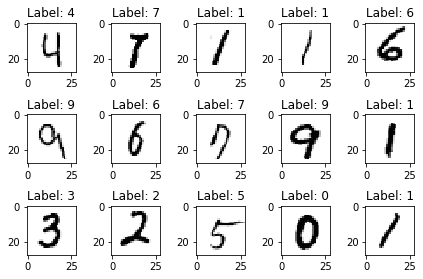

In [13]:
test_x,test_y=mnist.train.next_batch(15)
print(test_x)
print(corrcet_result.eval(feed_dict={x:test_x,keep_prob: 1.0}))
# acc=
fig = plt.figure()
for i in range(0,15,1):
    image=test_x[i].reshape(28,28)
    print(image.shape)
    lable=np.argmax(test_y[i])
    plt.subplot(3,5,i+1) # 绘制前15个手写体数字，以3行6列子图形式展示
    plt.tight_layout() # 自动适配
    plt.imshow(image, cmap='Greys') # 使用灰色显示像素灰度值
    plt.title("Label: {}".format(lable)) # 设置标签为子图标题